# Louvain算法实验 调用API
## 使用Python包 python-louvain

需要安装 python-louvain 包

python-louvain包的网站地址：[https://github.com/taynaud/python-louvain](https://github.com/taynaud/python-louvain)

python-louvain包文档地址：[https://github.com/taynaud/python-louvain](https://python-louvain.readthedocs.io/en/latest/)

In [1]:
# --------------------------- Louvain算法完整示例 ----------------------------
# 导入所需的第三方库
import pandas as pd                    # 用于数据整理与统计分析
import matplotlib.pyplot as plt        # 用于绘图与可视化
import networkx as nx                  # NetworkX：创建与操作复杂网络
from community import community_louvain  # community_louvain：实现 Louvain 社区发现

In [2]:
# -------------------------------------------------------------------------
# 1. 准备数据 —— 这里直接使用 NetworkX 自带的“空手道俱乐部”示例网络
G = nx.karate_club_graph()             # 生成 Zachary Karate Club 网络(34 个节点，78 条边)

# 【TODO】

In [ ]:
# -------------------------------------------------------------------------
# 2. 运行 Louvain 算法，获取每个节点所属的社区(分区结果)
# 【TODO】 编写一行代码，调用community_louvain的best_partition函数执行Louvain算法
#          请查看python-louvain 包的文档，学习best_partition函数的调用方法和返回值
com = community_louvain.best_partition(G)
# 输入参数 G: networkx 图对象
# 自动执行以下操作：计算网络的模块度 (Modularity),通过多级优化算法划分社区,返回最优社区划分结果
# 返回值 com: 字典类型，键为节点ID，值为所属社区编号
# 例如 {0: 0, 1: 0, 2: 1, ...} 表示节点0和1属于社区0，节点2属于社区1


In [4]:
# -------------------------------------------------------------------------
# 3. 计算每个节点的可视化大小 —— 这里将大小与节点度(degree)成正比
node_size = [G.degree(i)**1 * 20       # 对于网络中的每个节点 i
             for i in G.nodes()]       # G.degree(i) 表示节点 i 的度，乘 20 放大到合适范围

In [5]:
# -------------------------------------------------------------------------
# 4. 将分区结果整理成 Pandas DataFrame，方便后续统计与查看
df_com = pd.DataFrame({
    'Group_id': com.values(),          # 社区编号
    'object_id': com.keys()            # 节点编号
})

In [6]:
# -------------------------------------------------------------------------
# 5. 统计每个社区的人数(节点数)并按人数降序排列
# 对 Group_id 分组后计数
# 依据 object_id 的计数结果排序
# False 表示降序
df_com.groupby('Group_id').count().sort_values(by='object_id', ascending=False) 


,object_id
Group_id,
1,14
0,11
2,5
3,4


In [7]:
# -------------------------------------------------------------------------
# 6. 为每个社区分配颜色
#    先准备一个颜色列表，长度足够覆盖所有可能的社区
# 乘 500 只是保证颜色数足够多
colors = ['DeepPink','orange','DarkCyan','#A0CBE2','#3CB371','b','orange','y','c','#838B8B','purple','olive','#A0CBE2','#4EEE94'] * 500

#    根据分区结果为每个节点选取对应颜色
colors = [colors[i] for i in com.values()]

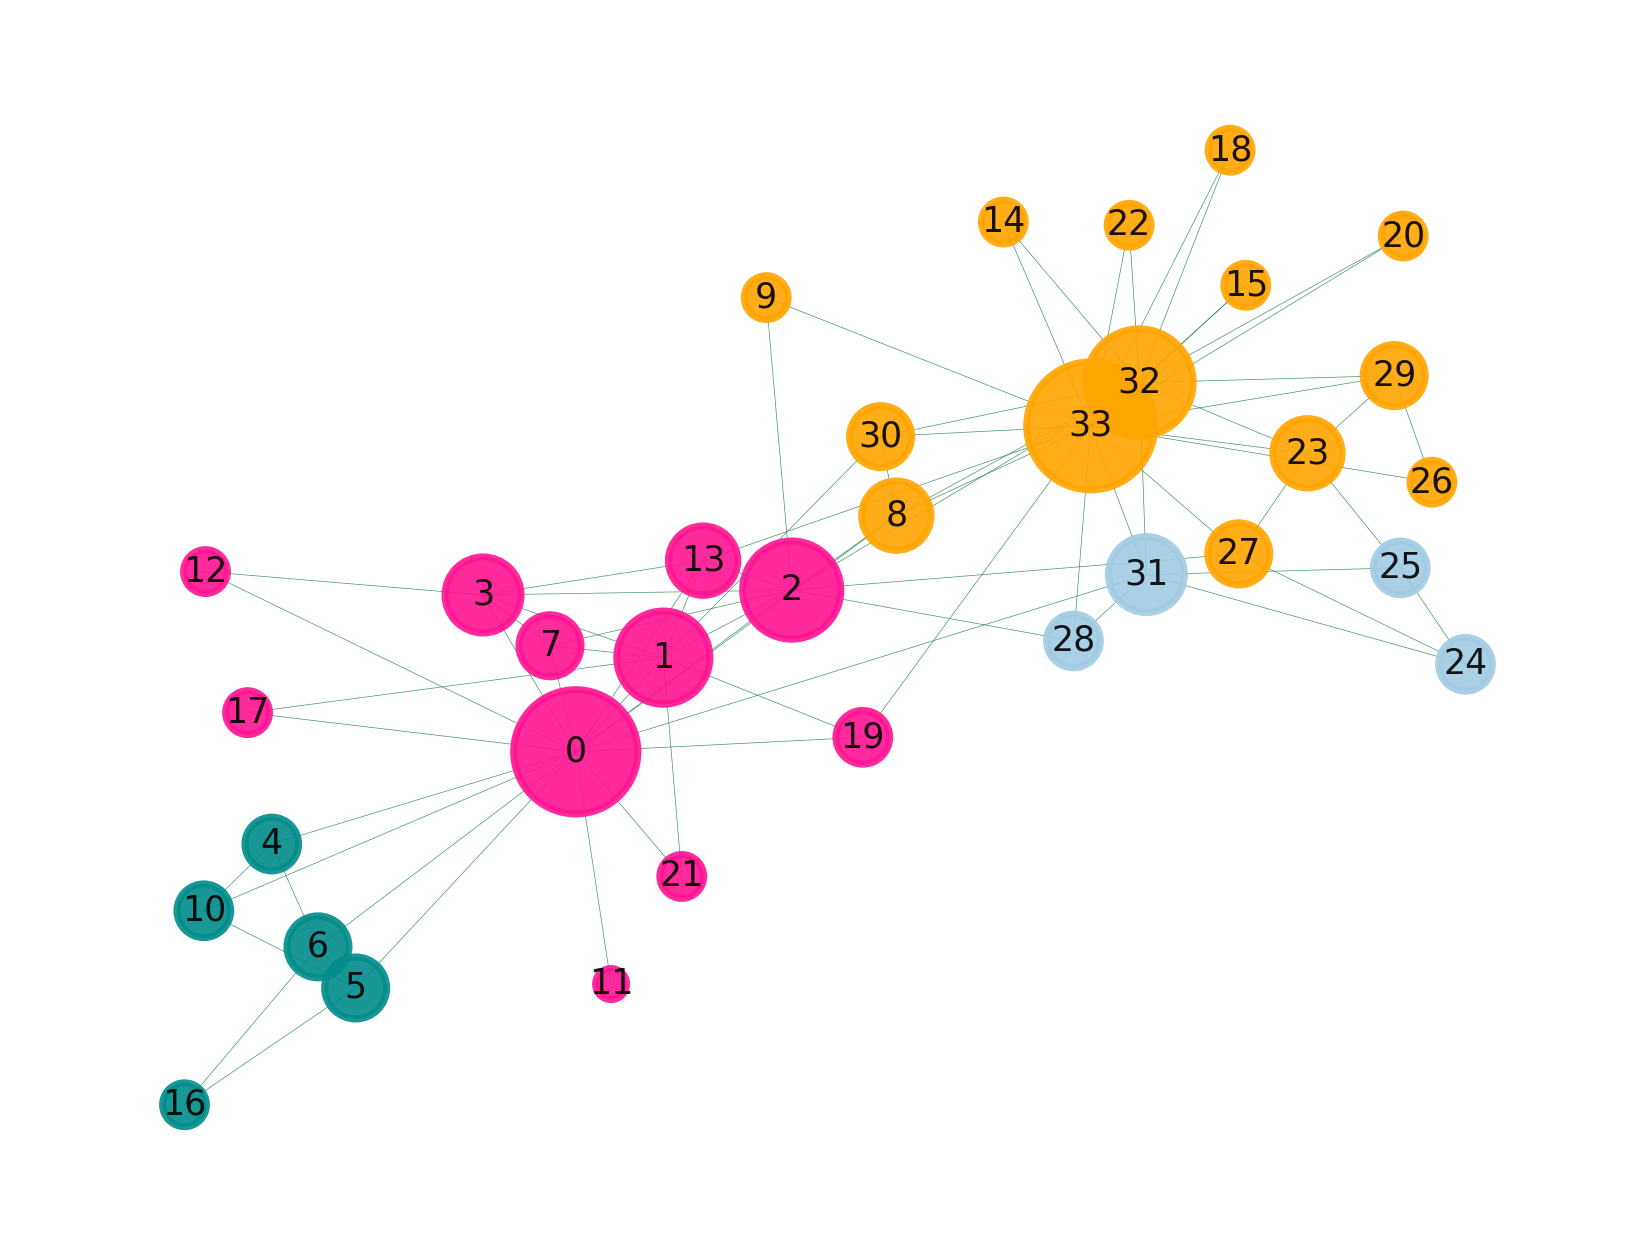

In [8]:
# -------------------------------------------------------------------------
# 7. 可视化
# 7‑1 创建画布
plt.figure(figsize=(4,3),dpi=500) # 设置图像尺寸 4×3 英寸，分辨率 500 dpi

# 7‑2 绘制网络
nx.draw_networkx(
    G,                                 # 要绘制的图
    pos=nx.spring_layout(G),           # 采用 spring_layout(弹簧布局)
    node_color=colors,                 # 节点颜色：根据社区编号着色
    edge_color='#2E8B57',              # 边颜色：深海绿色
    font_color='black',                # 节点标签字体颜色
    node_size=node_size,               # 节点大小：与度相关
    font_size=5,                       # 字体大小
    alpha=0.9,                         # 节点透明度
    width=0.1,                         # 边宽
    font_weight=0.9                    # 字体粗细
)
# 7‑3 去除坐标轴并显示
plt.axis('off')                        # 关闭坐标轴
plt.show()                             # 展示图形
